In [50]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Importing the dataset
data = pd.read_csv('C:/Users/jitender thakur/Downloads/titanic2.csv')

In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
data.shape

(891, 12)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### checking for null values

In [87]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Cabin 687 missing values

In [88]:
#dropping Cabin column
data.drop(['Cabin'], axis = 1, inplace = True)

In [89]:

data.dropna(subset = ["Embarked"], inplace=True)

In [90]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

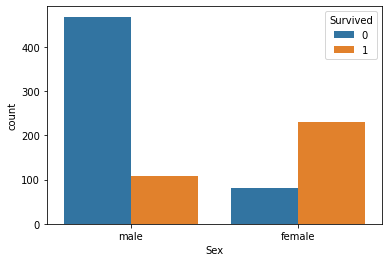

In [94]:
sns.countplot(data['Sex'],hue=data['Survived'])

## Surviving rate of female is more than male

### replacing missing values of age by mean

In [95]:
age_mean = data.Age.mean()
data['Age'] = data.Age.fillna(age_mean)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 123.3+ KB


In [97]:
#dropping Name column
data.drop(['Name'], axis = 1, inplace = True)

In [98]:
#onehot encodding SEX column
d= pd.get_dummies(data['Sex'])

In [99]:
data.drop(['Sex'], axis = 1, inplace = True)

data = pd.concat([data, d], axis = 1)

In [100]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,35.0,0,0,373450,8.0500,S,0,1


In [101]:
data.Embarked.value_counts().unique

<bound method Series.unique of S    644
C    168
Q     77
Name: Embarked, dtype: int64>

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

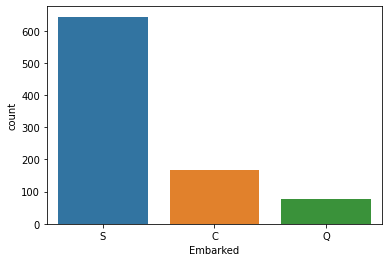

In [102]:
sns.countplot(data['Embarked'])

In [103]:
#onehot encodding EMBARKED column
emb= pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Embarked'], axis = 1, inplace = True)

data = pd.concat([data, emb], axis = 1)

In [104]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,female,male,Q,S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,0,1,0,1


In [105]:
#dropping Ticket column

data.drop(['Ticket'], axis = 1, inplace = True)

In [106]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


In [107]:
X = data.drop(['Survived'],axis=1)
y = data['Survived']

In [108]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 666)


In [109]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)



DecisionTreeClassifier()

In [110]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

<AxesSubplot:>

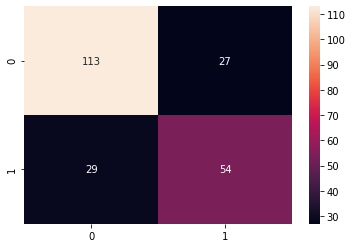

In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
cm= confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [82]:
print("Accuracy= {}, Recall= {}, Precision= {}".format(accuracy,recall,precision))

Accuracy= 0.7354260089686099, Recall= 0.6506024096385542, Precision= 0.6428571428571429
